<a href="https://colab.research.google.com/github/sbbzplt/QiskitFallFest_IZTECH/blob/master/Grovers_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Search


You may have heard that one of the advantages a quantum computer has over a classical computer is its superior speed searching databases.<br/>
Grover's algorithm demonstrates this capability. This algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the amplitude amplification trick.

This page will walk you through the description of the search problem, building the oracle - the circuit representation of our search problem, and implementing the complete Grover algorithm in Qiskit.

# Unstructured search
Suppose you are given a large list of N items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner w. Think of each item in the list as a box of a particular item. Say all items in the list have grey colored items except the winning item w.

<img src="./fig/unstructured_search.png" width="700">

To find the winning item -- the marked item -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is indeed a substantial time-saver for finding marked items in long lists. Additionally, the algorithm does not use the list's internal structure, which makes it generic; this is why it immediately provides a quadratic quantum speed-up for many classical problems.

# Creating an Oracle that marks the winning item
How will the list items be provided to the quantum computer? A common way to encode such a list is in terms of a function 𝑓 that returns $f(x)=0$ for all unmarked items $x$, and $f(w)=1$ for the winner. To use a quantum computer for this problem, we must provide the items in superposition to this function, so we encode the function into a unitary matrix called an **oracle**. First we choose a binary encoding of the items $x,w \in \{0,1\}^n$ so that $N=2^n$. This way, we can represent it in terms of qubits on a quantum computer. We then define the oracle matrix $U_w$ to act on any of the simple, standard basis states $|x>$ by $U_w |x> = (-1)^{f(x)}|x>$

We see that if $x$ is an unmarked item, the oracle does nothing to the state. However, when we apply the oracle to the basis state $|w>$, it maps $U_w |w> = -|w>$. Geometrically, this unitary matrix corresponds to a reflection about the origin for the marked item in an $N=2^n$-dimensional vector space.

<img src="./fig/oracle.png" width="700">

$ \newcommand{\ket}[1]{|#1\rangle} $
Suppose that we are given an unordered list and we make a search of a specific element called as marked.
- We access the list via an oracle: we can make queries to the list.
- If there are $ N $ elements in the list, we use $ \log(N) $ qubits. (Assume that $N$ is a power of 2.) 
- Each basis state, i.e., $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $, corresponds to an index of the list.
- If the searched element is detected, then the oracle flips the sign of the corresponding amplitude.

<i style="color:blue;">Below, we will simulate the oracle with the pre-knowledge of marked element(s). In the real implementation, the oracle should have a quantum mechanism detecting the marked elements while being in a superposition of all indices, and then the sign(s) of the corresponding amplitude(s) is (are) flipped automatically. This is indeed the main technological challenge for implementing Grover's search algorithm.</i>

At the beginning, Hadamard operator is applied to each qubit. Thus, the amplitude of each basis state is set to $ \frac{1}{\sqrt{N}} $.
- We can interpret this as all elements start with the same amplitude.
- As we iterate the amplitudes of marked and unmarked elements are changed.

# Amplitude amplification
So how does the algorithm work? Before looking at the list of items, we have no idea where the marked item is. Therefore, any guess of its location is as good as any other. You may have heard the term superposition This can be expressed in terms of a uniform superposition: <br/>
$$|s> = \frac{1}{\sqrt N}\sum_{x=0}^{N-1} |x> $$

If at this point we were to measure in the standard basis $|x>$, this superposition would collapse to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^{n}} $. Our chances of guessing the right value $|w>$ is therefore $\frac{1}{2^{n}}$, as could be expected. Hence, on average we would need to try about $N=2^{n}$ times to guess the correct item.

Now let's play a game to understand how amplitude amplification works in Grover's Search.

We have a list of N elements. 

Some of them are marked.

At the beginning each has a value of 1.

 Each iteration of the game has two phases:

<ol>
    <li><b>Query</b>: In this phase, we assume that each marked element is detected, and then its sign is flipped.</li>
    <li><b>Inversion</b>: In this phase, the value of each element is reflected over the mean of all values.</li>
</ol>

We play this game for $ N = 8 $.

Suppose that only the 4th element is marked.

We can visualize the values of elements in the list in the beginning as follows.

In [ ]:
from matplotlib.pyplot import bar

labels = []
elements = []
for i in range(8):
    labels = labels + [i+1]
    elements  = elements + [1]

# visualize the values of elements in the list 
bar(labels,elements)

In [ ]:
# 
# 1st step - query
#

# flip the sign of the marked element
elements[3] = -1 * elements[3]

# visualize the values of elements in the list 
bar(labels,elements)

1st step - inversion phase:

In [ ]:
#
# 1st step - inversion
#

# summation of all values
sum = 0
for i in range(len(elements)):
    sum += elements[i]

# mean of all values
mean = sum / len(elements)

# reflection over the mean
for i in range(len(elements)):
    value = elements[i]
    new_value = mean - (value-mean)
    elements[i] = new_value

# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game for one more step and visualize the values of elements in the list after each phase.

2nd step - query phase:

In [ ]:
# 
# 2nd step - query
#

# flip the sign of the marked element
elements[3] = -1 * elements[3]

# visualize the values of elements in the list 
bar(labels,elements)

2nd step - inversion phase:

In [ ]:
#
# 2nd step - inversion
#

# summation of all values
sum = 0
for i in range(len(elements)):
    sum += elements[i]

# mean of all values
mean = sum / len(elements)

# reflection over mean
for i in range(len(elements)):
    value = elements[i]
    new_value = mean - (value-mean)
    elements[i] = new_value

# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game three more steps and visualize the values of elements in the list at the end.

In [ ]:
for i in range(3):
    # flip the sign of the marked element
    elements[3] = -1 * elements[3]
    
    # summation of all values
    sum = 0
    for i in range(len(elements)):
        sum += elements[i]

    # mean of all values
    mean = sum / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (value-mean)
        elements[i] = new_value
        
# visualize the values of elements in the list 
bar(labels,elements)        

<h4> The number of iterations </h4>

When the number of marked elements are less than the unmarked elements, the amplitudes of marked elements start to increase. 

Then, we reach the first peak such that the probability of observing a marked element takes its maximum value. 

After passing this point, the amplitudes of marked elements start to decrease.

## Qiskit implementation: Grover's algorithm using 3 qubits
Now, let's impement Grover's algorithm using Qiskit. In this example, we will use 3 qubits to find the state |11⟩.

First we prepare our environment.

In [ ]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

As we have seen in Step1, let us create an oracle to mark the state |11⟩. 

First, we will set qubit 2 to 1 if the input state is |11>.

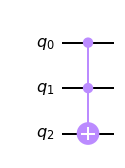

In [ ]:
def phase_oracle():
    qc = QuantumCircuit(3)
    qc.ccx(0,1,2)
    return qc

qc = QuantumCircuit(3)
qc += phase_oracle()
qc.draw(output="mpl")

But this is not enough. We need to flip the amplitude of the corresponding state. So, we will use a Z gate. 

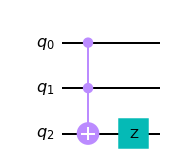

In [ ]:
def phase_oracle():
    qc = QuantumCircuit(3)
    qc.ccx(0,1,2)
    return qc

qc = QuantumCircuit(3)
qc += phase_oracle()
qc.z(2)
qc.draw(output="mpl")

We are not done. We need to revert back what we have done to qubit 2, to not affect the rest of the computation. This will become clear in more complicated circuits. There is a function called `inverse()` which can do this for us.

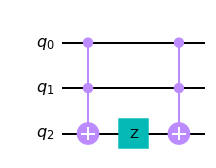

In [ ]:
def phase_oracle():
    qc = QuantumCircuit(3)
    qc.ccx(0,1,2)
    return qc

qc = QuantumCircuit(3)
qc += phase_oracle()
qc.z(2)
qc += phase_oracle().inverse()
qc.draw(output="mpl")

Next we set up the circuit for inversion about the average as we saw in step 2. This circuit is sometimes called an amplitude ampification module or a diffusion circuit.

In [ ]:
def inversion_about_average():
    """Apply inversion about the average step of Grover's algorithm."""
    circuit = QuantumCircuit(3)
    for i in range(2):
        circuit.h(i)
    for i in range(2):
        circuit.x(i)
    circuit.h(1)
    circuit.cx(0, 1)
    circuit.h(1)
    for i in range(2):
        circuit.x(i)
    for i in range(2):
        circuit.h(i)
    return circuit

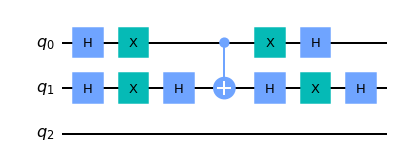

In [ ]:
qAverage = QuantumCircuit(3)
qAverage += inversion_about_average()
qAverage.draw(output='mpl')

Now we put the pieces together.

We first create a uniform superposition at the start of the circuit.
Then we apply oracle to mark the state. To put the -1 in front, we use a Z gate.
The we call the circuit for inversion over the average.

1 iteration is sufficient in this case.

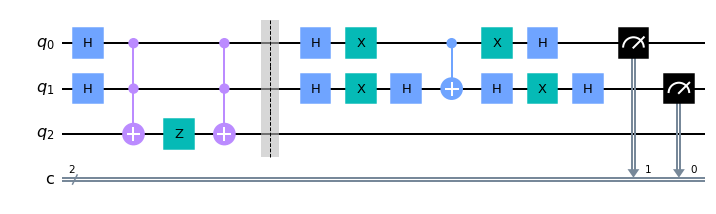

In [ ]:
groverCircuit = QuantumCircuit(3,2)
for i in range(2):
    groverCircuit.h(i)

#query phase
groverCircuit += phase_oracle()
groverCircuit.z(2)
groverCircuit += phase_oracle().inverse()

groverCircuit.barrier()

#inversion phase
groverCircuit += inversion_about_average()

#measure in reverse order
for i in range(2):    
    groverCircuit.measure(i,1-i)

groverCircuit.draw(output="mpl")

### Experiment with Simulators
We now run the above circuit on the simulator.

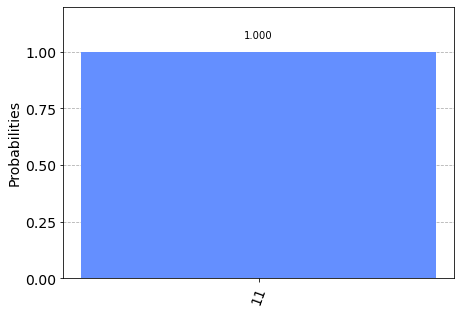

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

As we can see, the algorithm discovers our marked states.

### Task 1
Implement Grover's algorithm with 2 qubits to find the answer $|10>$.

You can use the same diffusion operator. You need to create a new oracle to mark state 10.

In [ ]:
def new_oracle():
    
    #Your code here

In [ ]:
def inversion_about_average():
    """Apply inversion about the average step of Grover's algorithm."""
    circuit = QuantumCircuit(3)
    for i in range(2):
        circuit.h(i)
    for i in range(2):
        circuit.x(i)
    circuit.h(1)
    circuit.cx(0, 1)
    circuit.h(1)
    for i in range(2):
        circuit.x(i)
    for i in range(2):
        circuit.h(i)
    return circuit

In [ ]:
groverCircuit = QuantumCircuit(3,2)
for i in range(2):
    groverCircuit.h(i)

#query phase
groverCircuit += new_oracle()
groverCircuit.z(2)
groverCircuit += new_oracle().inverse()

groverCircuit.barrier()

#inversion phase
groverCircuit += inversion_about_average()

#measure in reverse order
for i in range(2):    
    groverCircuit.measure(i,1-i)

groverCircuit.draw(output="mpl")

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

[click for our solution](Grovers_search_solutions.ipynb#task1)